In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [ ]:
df=pd.read_csv(r'/content/asl_hackathon2.csv')
output=df['class']

output=np.array(output)
df=df.drop(['class'],axis=1)
arr=df.to_numpy()

arr.shape

(6659, 42)

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
model= tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(42,)),tf.keras.layers.Dense(256,activation='sigmoid'),tf.keras.layers.Dense(64,activation='sigmoid'),tf.keras.layers.Dense(25)])

In [ ]:
preds = model(arr[:1]).numpy()
preds=tf.nn.softmax(preds).numpy()
preds

array([[0.04691115, 0.06930969, 0.02052601, 0.06627694, 0.02675924,
        0.05378831, 0.12236021, 0.02165456, 0.03243482, 0.03556322,
        0.03472521, 0.02103437, 0.03083415, 0.03219243, 0.05486039,
        0.03912967, 0.01961796, 0.04490687, 0.04081615, 0.05587054,
        0.0180703 , 0.0148248 , 0.02468002, 0.03672261, 0.03613038]],
      dtype=float32)

In [ ]:
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer='adam',loss=loss,metrics='accuracy')

In [ ]:
history=model.fit(arr,output,epochs=25)

Epoch 1/25
209/209 [==============================] - 3s 3ms/step - loss: 3.2173 - accuracy: 0.0520
Epoch 2/25
209/209 [==============================] - 1s 3ms/step - loss: 3.1099 - accuracy: 0.1000
Epoch 3/25
209/209 [==============================] - 1s 3ms/step - loss: 2.6783 - accuracy: 0.2197
Epoch 4/25
209/209 [==============================] - 1s 3ms/step - loss: 2.1967 - accuracy: 0.3547
Epoch 5/25
209/209 [==============================] - 1s 3ms/step - loss: 1.8019 - accuracy: 0.5118
Epoch 6/25
209/209 [==============================] - 1s 4ms/step - loss: 1.4805 - accuracy: 0.6354
Epoch 7/25
209/209 [==============================] - 1s 5ms/step - loss: 1.2291 - accuracy: 0.7459
Epoch 8/25
209/209 [==============================] - 1s 5ms/step - loss: 1.0283 - accuracy: 0.8210
Epoch 9/25
209/209 [==============================] - 1s 4ms/step - loss: 0.8605 - accuracy: 0.8749
Epoch 10/25
209/209 [==============================] - 1s 3ms/step - loss: 0.7171 - accuracy: 0.9031

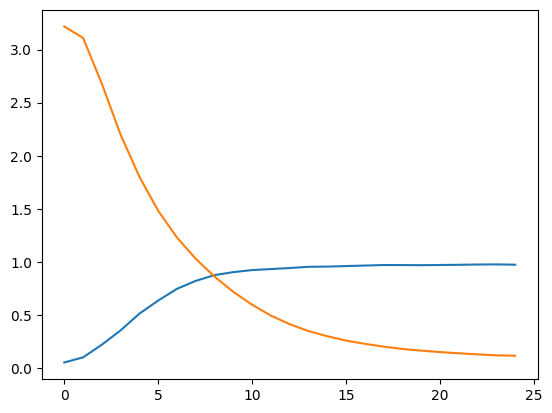

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.show()

In [ ]:
model.save('weights_asl_hackathon.keras')